## Visualization Script for MongoDB Data

In [125]:
import pymongo
import pprint as p
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [126]:
client = pymongo.MongoClient('localhost', 27017)

In [127]:
db = client.tanken
preise = db.preise
stationen = db.stationen
res = []

### Average price of E5, E10 and Diesel in 2020 total

In [148]:
#MongoDB Query - takes a while
res = preise.aggregate([
    {
        "$group" : {"_id": "null" , "e10": {"$avg": "$e10"},"e5": {"$avg": "$e5"},"diesel": {"$avg": "$diesel"}}
    }
])
result = list(res)

In [149]:
prices = result[0]
print("Durchschnittliche Preise in 2020 nach Kategorie")
print("E10: "+ str(prices["e10"]))
print("E05: "+ str(prices["e5"]))
print("Diesel: "+ str(prices["diesel"]))

Durchschnittliche Preise in 2020 nach Kategorie
E10: 1.2092071354722296
E05: 1.27504803260726
Diesel: 1.1118849282747298


### Average E5, E10 and Diesel price per month in 2020

In [150]:
#MongoDB Query - Avg. E10/E05 prices - takes a while
res = preise.aggregate([
    {
        "$group" : {"_id": "$date" , "e5": {"$avg": "$e5"}, "e10": {"$avg": "$e10"}}
    }
])
pricesEClass = list(res)

In [151]:
#MongoDB Query - Avg. Diesel prices - takes a while
res = preise.aggregate([
    {
        "$group" : {"_id": "$date" , "diesel": {"$avg": "$diesel"}}
    }
])
pricesDiesel = list(res)

In [ ]:
def getMonths(l):
    month = []
    for element in l:
        month.append(element["_id"][5:7])
    a = list(set(month))
    a.sort()
    return a

def getAvgPriceOfMonth(month, l, cat):
    price = 0
    count = 0
    for element in l:
        if element["_id"][5:7] == month:
            price = price + element[cat]
            count = count + 1
    price = price / count
    return price

def getPriceOfMonths(l, cat):
    print("Durchschnittliche Preise pro Monat von: " + cat)
    months = getMonths(l)
    pricesDict = []
    prices = []
    for month in months:
        price = getAvgPriceOfMonth(month, l, cat)
        prices.append(price)
        pricesDict.append({"Monat": month, "Preis": price})
        print("Monat: " + month+" | Durchschnittlicher Preis: "+ str(price))
    return pricesDict, prices, months

In [130]:
monthDictE5, pricesE5, monthsE5 = getPriceOfMonths(pricesEClass, "e5")

Durchschnittliche Preise pro Monat von: e5
Monat: 01 | Durchschnittlicher Preis: 1.3809709460691033
Monat: 02 | Durchschnittlicher Preis: 1.3696519229296191
Monat: 03 | Durchschnittlicher Preis: 1.2740411152446436
Monat: 04 | Durchschnittlicher Preis: 1.1639490629888185
Monat: 05 | Durchschnittlicher Preis: 1.1596067276434425
Monat: 06 | Durchschnittlicher Preis: 1.228204389718489
Monat: 07 | Durchschnittlicher Preis: 1.2535407977442248
Monat: 08 | Durchschnittlicher Preis: 1.2446060539947754
Monat: 09 | Durchschnittlicher Preis: 1.2413280301206224
Monat: 10 | Durchschnittlicher Preis: 1.2306790167741453
Monat: 11 | Durchschnittlicher Preis: 1.1879558184113672


In [131]:
monthDictE10, pricesE10, monthsE10 = getPriceOfMonths(pricesEClass, "e10")

Durchschnittliche Preise pro Monat von: e10
Monat: 01 | Durchschnittlicher Preis: 1.308972591784147
Monat: 02 | Durchschnittlicher Preis: 1.2852759327647496
Monat: 03 | Durchschnittlicher Preis: 1.1897528740154852
Monat: 04 | Durchschnittlicher Preis: 1.088478063668083
Monat: 05 | Durchschnittlicher Preis: 1.0761478887482794
Monat: 06 | Durchschnittlicher Preis: 1.142607026470057
Monat: 07 | Durchschnittlicher Preis: 1.1601250803569065
Monat: 08 | Durchschnittlicher Preis: 1.1514669124804495
Monat: 09 | Durchschnittlicher Preis: 1.149224024017031
Monat: 10 | Durchschnittlicher Preis: 1.1329302755471922
Monat: 11 | Durchschnittlicher Preis: 1.0906952574675182


In [133]:
monthDictDiesel, pricesD, monthsDiesel = getPriceOfMonths(pricesDiesel, "diesel")

Durchschnittliche Preise pro Monat von: diesel
Monat: 01 | Durchschnittlicher Preis: 1.288744597249507
Monat: 02 | Durchschnittlicher Preis: 1.2211158129175945
Monat: 03 | Durchschnittlicher Preis: 1.1593877551020406
Monat: 04 | Durchschnittlicher Preis: 1.0581176470588227
Monat: 05 | Durchschnittlicher Preis: 1.0129300411522615
Monat: 06 | Durchschnittlicher Preis: 1.0525700197238665
Monat: 07 | Durchschnittlicher Preis: 1.0552478485370034
Monat: 08 | Durchschnittlicher Preis: 1.0547820738137097
Monat: 09 | Durchschnittlicher Preis: 1.029762711864408
Monat: 10 | Durchschnittlicher Preis: 1.0004919852034584
Monat: 11 | Durchschnittlicher Preis: 0.979165745856354


# Monatlicher Preisverlauf von E10

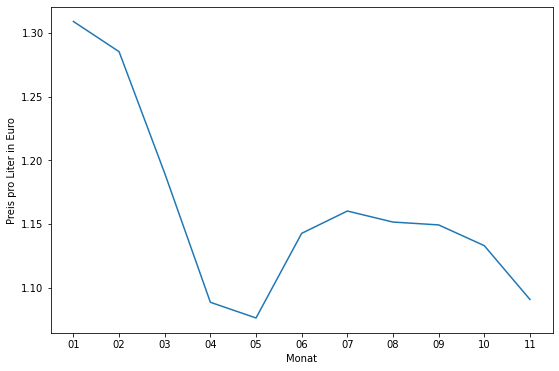

In [134]:
F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*1.5, Size[1]*1.5, forward=True)
plt.plot(monthsE10, pricesE10)
plt.xlabel('Monat')
plt.ylabel('Preis pro Liter in Euro')
plt.show()

# Monatlicher Preisverlauf von E5

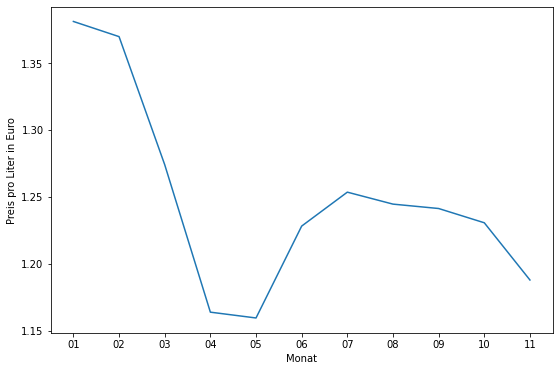

In [135]:
F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*1.5, Size[1]*1.5, forward=True)
plt.plot(monthsE5, pricesE5)
plt.xlabel('Monat')
plt.ylabel('Preis pro Liter in Euro')
plt.show()

# Monatlicher Preisverlauf von Diesel

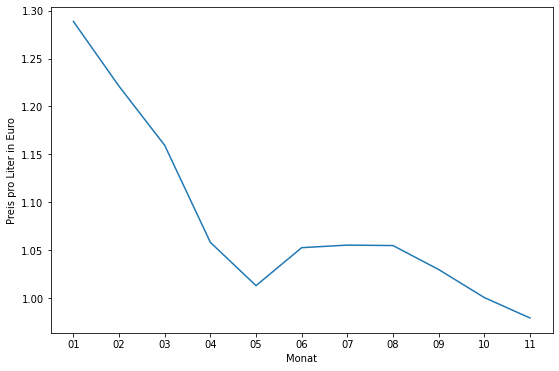

In [136]:
F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*1.5, Size[1]*1.5, forward=True)
plt.plot(monthsDiesel, pricesD)
plt.xlabel('Monat')
plt.ylabel('Preis pro Liter in Euro')
plt.show()

### E10, E5 und Diesel im Vergleich

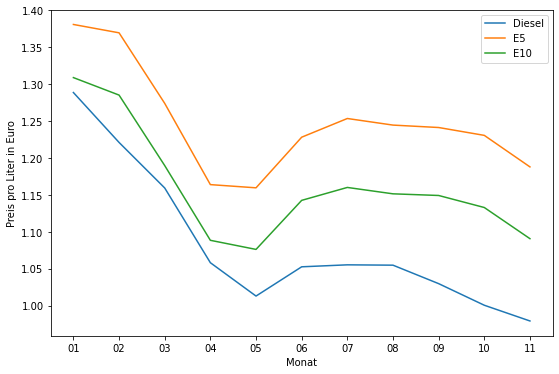

In [137]:
F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*1.5, Size[1]*1.5, forward=True)
plt.plot(monthsDiesel, pricesD)
plt.plot(monthsE5, pricesE5)
plt.plot(monthsE10, pricesE10)
plt.legend(['Diesel','E5','E10'])
plt.xlabel('Monat')
plt.ylabel('Preis pro Liter in Euro')
plt.show()

### Average price per day during year

In [140]:
def getPricesPerDayCat(l,date,cat):
    dayPrices = []
    price = 0
    count = 0
    for element in l:
        if element["_id"][0:10] == date:
            dayPrices.append(element[cat])
            price = price + (element[cat])
            count = count + 1
    return dayPrices, (price/count)


def getDates(l):
    dates = []
    for element in l:
        dates.append(element["_id"][0:10])
    a = list(set(dates))
    a.sort()
    return a

def getAvgPricePerDay(l, cat):
    dates = getDates(l)
    priceDict = []
    prices = []
    for date in dates:
        dayPrices, avgPrice = getPricesPerDayCat(l, date, cat)
        priceDict.append({"Tag":date,"Preis":avgPrice })
        prices.append(avgPrice)
    return priceDict, prices, dates

In [141]:
dieselyear, prices, dates = getAvgPricePerDay(pricesDiesel,"diesel")

## Preisverlauf von Diesel im Jahr 2020 (Jeder Tag)

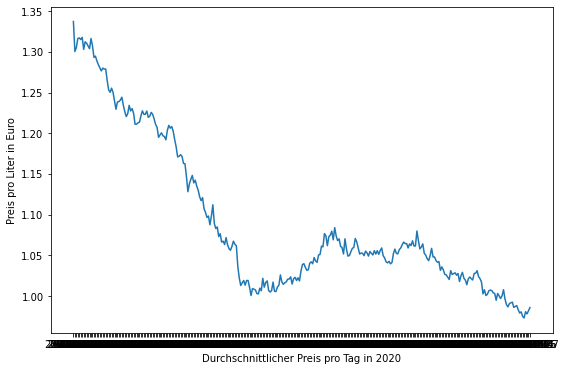

In [142]:
F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*1.5, Size[1]*1.5, forward=True)
plt.plot(dates, prices)
plt.xlabel('Durchschnittlicher Preis pro Tag in 2020')
plt.ylabel('Preis pro Liter in Euro')
plt.show()

## Average price during day

In [192]:
def getHours(l):
    hours = []
    for element in l:
        hours.append(element["_id"][11:13])
    a = list(set(hours))
    a.sort()
    return a

def getAvgPriceAtHour(l, date, time, cat):
    price = 0
    count = 0
    for element in l:
        if(element["_id"][0:10] == date):
            if (element["_id"][11:13] == time):
                price = price + element[cat]
                count = count + 1
    if count == 0:
        count = 1
    return (price/count)

def getAvgPriceEveryHour(l,date,cat):
    print("Tag: " + date + ", Kategorie: " +cat)
    hours = getHours(l)
    priceDict = []
    prices = []
    for hour in hours:
        hourPrice = getAvgPriceAtHour(l, date, hour, cat)
        priceDict.append({"Stunde": hour, "Preis": hourPrice})
        prices.append(hourPrice)
       # print(hour+":00 - "+hour+":59 Uhr | Durchschnittspreis: " + str(hourPrice))
    return priceDict, prices, hours

def getAvgPriceEveryHourTotal(l,cat):
    print("Durchschnittlicher Tagesverlauf in 2020, Kategorie: " + cat)
    dates = getDates(l)
    pricesTotal = []
    count = 0
    for i in range(0,24):
        pricesTotal.append(0)
    for date in dates:
        priceDict, dayPrices, dayHours = getAvgPriceEveryHour(l,date,cat)
        i = 0
        while i < len(dayPrices):
            if count > 0:
                pricesTotal[i] = (pricesTotal[i] + dayPrices[i])/2
            else:
                pricesTotal[i] = (pricesTotal[i] + dayPrices[i])
            i = i + 1
            count = count + 1
    return pricesTotal

In [193]:
pricesHourTotal = getAvgPriceEveryHourTotal(pricesEClass, "e5")

Durchschnittlicher Tagesverlauf in 2020, Kategorie: e5
Tag: 2020-01-01, Kategorie: e5
Tag: 2020-01-02, Kategorie: e5
Tag: 2020-01-03, Kategorie: e5
Tag: 2020-01-04, Kategorie: e5
Tag: 2020-01-05, Kategorie: e5
Tag: 2020-01-06, Kategorie: e5
Tag: 2020-01-07, Kategorie: e5
Tag: 2020-01-08, Kategorie: e5
Tag: 2020-01-09, Kategorie: e5
Tag: 2020-01-10, Kategorie: e5
Tag: 2020-01-11, Kategorie: e5
Tag: 2020-01-12, Kategorie: e5
Tag: 2020-01-13, Kategorie: e5
Tag: 2020-01-14, Kategorie: e5
Tag: 2020-01-15, Kategorie: e5
Tag: 2020-01-16, Kategorie: e5
Tag: 2020-01-17, Kategorie: e5
Tag: 2020-01-18, Kategorie: e5
Tag: 2020-01-19, Kategorie: e5
Tag: 2020-01-20, Kategorie: e5
Tag: 2020-01-21, Kategorie: e5
Tag: 2020-01-22, Kategorie: e5
Tag: 2020-01-23, Kategorie: e5
Tag: 2020-01-24, Kategorie: e5
Tag: 2020-01-25, Kategorie: e5
Tag: 2020-01-26, Kategorie: e5
Tag: 2020-01-27, Kategorie: e5
Tag: 2020-01-28, Kategorie: e5
Tag: 2020-01-29, Kategorie: e5
Tag: 2020-01-30, Kategorie: e5
Tag: 2020-01-31

Tag: 2020-09-20, Kategorie: e5
Tag: 2020-09-21, Kategorie: e5
Tag: 2020-09-22, Kategorie: e5
Tag: 2020-09-23, Kategorie: e5
Tag: 2020-09-24, Kategorie: e5
Tag: 2020-09-25, Kategorie: e5
Tag: 2020-09-26, Kategorie: e5
Tag: 2020-09-27, Kategorie: e5
Tag: 2020-09-28, Kategorie: e5
Tag: 2020-09-29, Kategorie: e5
Tag: 2020-09-30, Kategorie: e5
Tag: 2020-10-01, Kategorie: e5
Tag: 2020-10-02, Kategorie: e5
Tag: 2020-10-03, Kategorie: e5
Tag: 2020-10-04, Kategorie: e5
Tag: 2020-10-05, Kategorie: e5
Tag: 2020-10-06, Kategorie: e5
Tag: 2020-10-07, Kategorie: e5
Tag: 2020-10-08, Kategorie: e5
Tag: 2020-10-09, Kategorie: e5
Tag: 2020-10-10, Kategorie: e5
Tag: 2020-10-11, Kategorie: e5
Tag: 2020-10-12, Kategorie: e5
Tag: 2020-10-13, Kategorie: e5
Tag: 2020-10-14, Kategorie: e5
Tag: 2020-10-15, Kategorie: e5
Tag: 2020-10-16, Kategorie: e5
Tag: 2020-10-17, Kategorie: e5
Tag: 2020-10-18, Kategorie: e5
Tag: 2020-10-19, Kategorie: e5
Tag: 2020-10-20, Kategorie: e5
Tag: 2020-10-21, Kategorie: e5
Tag: 202

# Tagesverlauf von E5 in 2020

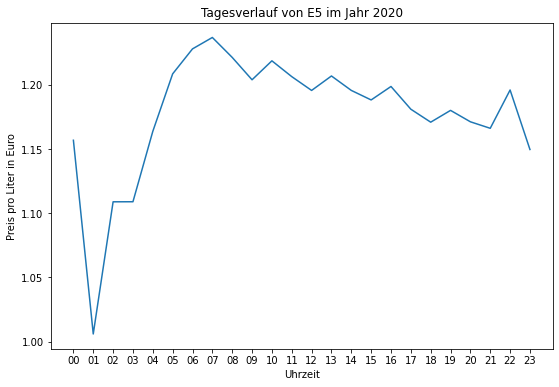

In [198]:
F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*1.5, Size[1]*1.5, forward=True)
plt.plot(dayHoursDiesel, pricesHourTotal)
plt.xlabel('Uhrzeit')
plt.ylabel('Preis pro Liter in Euro')
plt.title("Tagesverlauf von E5 im Jahr 2020")
plt.show()

# Tagesverlauf von Diesel an einem bestimmten Tag 
## 28.08.2020

In [199]:
dayDictDiesel, dayPricesDiesel, dayHoursDiesel = getAvgPriceEveryHour(pricesDiesel, "2020-08-28", "diesel")

Tag: 2020-08-28, Kategorie: diesel


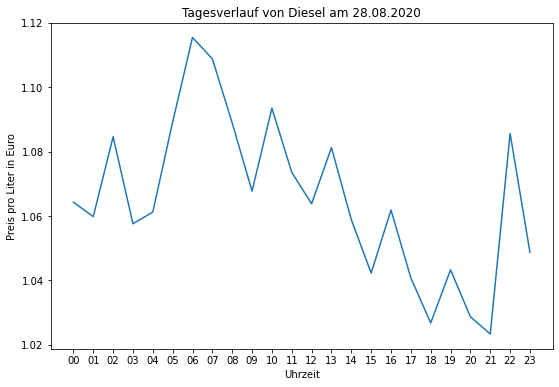

In [200]:
F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*1.5, Size[1]*1.5, forward=True)
plt.plot(dayHoursDiesel, dayPricesDiesel)
plt.xlabel('Uhrzeit')
plt.ylabel('Preis pro Liter in Euro')
plt.title("Tagesverlauf von Diesel am 28.08.2020")
plt.show()

## Pricing cities

In [38]:
res = stationen.aggregate([
    { 
        "$match": 
        {
            "$or": [ { "city": "München" }, { "city": "Freiburg" }, { "city": "Frankfurt"}, { "city": "Hamburg"}, { "city": "Berlin"},{ "city": "Köln"}]
        }
    }

])
cityStations = list(res)

In [39]:
def getCities(l):
    cities = []
    for element in l:
        cities.append(element["city"])
    return list(set(cities))

def splitIDforCity(l, cities):
    cityIDs = []
    for city in cities:
        for element in l:
            if element["city"] == city:
                cityIDs.append({"Stadt": city, "ID": element["uuid"]})
    return cityIDs

def getIDsByCity(ids, city):
    cityIDs = []
    for id in ids:
        if id['Stadt'] == city:
            cityIDs.append({"station_uuid": id['ID']})
    return cityIDs


In [105]:
ids = splitIDforCity(cityStations, getCities(cityStations))

In [202]:
munichIds = getIDsByCity(ids, "München")
ffIds = getIDsByCity(ids, "Frankfurt")
hamburgIds = getIDsByCity(ids, "Hamburg")

In [98]:
#MongoDB Query - Avg. E5 prices for Munich - takes forever
res = preise.aggregate([
    
      
        {
            "$match":   {"$or":munichIds }
        },
        {
            "$group" : {"_id": "$date" , "e5": {"$avg": "$e5"}}
        }
        
    
])
e5Munich = list(res)

In [109]:
#MongoDB Query - Avg. E5 prices for Frankfurt - takes forever too
res = preise.aggregate([
    
      
        {
            "$match":   {"$or":ffIds }
        },
        {
            "$group" : {"_id": "$date" , "e5": {"$avg": "$e5"}}
        }
        
    
])
e5Frankfurt = list(res)

[{'_id': '2020-05-20 11:34:08+02', 'e5': 1.169},
 {'_id': '2020-05-23 12:15:13+02', 'e5': 1.249},
 {'_id': '2020-05-08 07:35:05+02', 'e5': 1.309},
 {'_id': '2020-07-01 08:08:12+02', 'e5': 1.379},
 {'_id': '2020-05-06 14:12:11+02', 'e5': 1.1456666666666668},
 {'_id': '2020-10-31 18:05:15+01', 'e5': 1.199},
 {'_id': '2020-05-04 16:56:08+02', 'e5': 1.139},
 {'_id': '2020-02-28 12:05:08+01', 'e5': 1.359},
 {'_id': '2020-04-22 18:25:10+02', 'e5': 1.1123333333333332},
 {'_id': '2020-07-04 16:44:07+02', 'e5': 1.289},
 {'_id': '2020-09-21 16:11:07+02', 'e5': 1.289},
 {'_id': '2020-01-09 13:48:08+01', 'e5': 1.349},
 {'_id': '2020-03-11 19:27:06+01', 'e5': 1.334},
 {'_id': '2020-10-26 13:31:06+01', 'e5': 1.299},
 {'_id': '2020-11-07 11:09:08+01', 'e5': 1.2145000000000001},
 {'_id': '2020-07-03 13:52:07+02', 'e5': 1.299},
 {'_id': '2020-01-24 17:44:08+01', 'e5': 1.419},
 {'_id': '2020-04-21 20:04:06+02', 'e5': 1.1139999999999999},
 {'_id': '2020-03-08 19:09:07+01', 'e5': 1.299},
 {'_id': '2020-07

In [205]:
#MongoDB Query - Avg. E5 prices for Hamburg - takes forever too
res = preise.aggregate([
    
      
        {
            "$match":   {"$or":hamburgIds }
        },
        {
            "$group" : {"_id": "$date" , "e5": {"$avg": "$e5"}}
        }
        
    
])
e5Hamburg = list(res)

In [112]:
monthDictE5Munich, pricesE5Munich, monthsE5Munich = getPriceOfMonths(e5Munich, "e5")

Durchschnittliche Preise pro Monat von: e5
Monat: 01 | Durchschnittlicher Preis: 1.4016740326349397
Monat: 02 | Durchschnittlicher Preis: 1.393829289061536
Monat: 03 | Durchschnittlicher Preis: 1.3261688806414875
Monat: 04 | Durchschnittlicher Preis: 1.2140799482224989
Monat: 05 | Durchschnittlicher Preis: 1.1765389351528328
Monat: 06 | Durchschnittlicher Preis: 1.245312425985356
Monat: 07 | Durchschnittlicher Preis: 1.2779515853368493
Monat: 08 | Durchschnittlicher Preis: 1.2705378271930943
Monat: 09 | Durchschnittlicher Preis: 1.2633388683898672
Monat: 10 | Durchschnittlicher Preis: 1.2577539602855305
Monat: 11 | Durchschnittlicher Preis: 1.2204942145284956


In [113]:
monthDictE5ff, pricesE5ff, monthsE5ff = getPriceOfMonths(e5Frankfurt, "e5")

Durchschnittliche Preise pro Monat von: e5
Monat: 01 | Durchschnittlicher Preis: 1.4033718823566055
Monat: 02 | Durchschnittlicher Preis: 1.4115005747513805
Monat: 03 | Durchschnittlicher Preis: 1.2938011373293654
Monat: 04 | Durchschnittlicher Preis: 1.1711349637608834
Monat: 05 | Durchschnittlicher Preis: 1.1959217461972977
Monat: 06 | Durchschnittlicher Preis: 1.264000453024507
Monat: 07 | Durchschnittlicher Preis: 1.28504677253642
Monat: 08 | Durchschnittlicher Preis: 1.2860978358744284
Monat: 09 | Durchschnittlicher Preis: 1.2818151713471846
Monat: 10 | Durchschnittlicher Preis: 1.2677402537191746
Monat: 11 | Durchschnittlicher Preis: 1.2313997366311327


In [206]:
monthDictE5hh, pricesE5hh, monthsE5hh = getPriceOfMonths(e5Hamburg, "e5")

Durchschnittliche Preise pro Monat von: e5
Monat: 01 | Durchschnittlicher Preis: 1.3930158934757446
Monat: 02 | Durchschnittlicher Preis: 1.3883351469401615
Monat: 03 | Durchschnittlicher Preis: 1.305524959680435
Monat: 04 | Durchschnittlicher Preis: 1.2030716457284252
Monat: 05 | Durchschnittlicher Preis: 1.1989316162264403
Monat: 06 | Durchschnittlicher Preis: 1.2585129216737063
Monat: 07 | Durchschnittlicher Preis: 1.2935700086780983
Monat: 08 | Durchschnittlicher Preis: 1.265359424025569
Monat: 09 | Durchschnittlicher Preis: 1.274910854791063
Monat: 10 | Durchschnittlicher Preis: 1.2710766151424904
Monat: 11 | Durchschnittlicher Preis: 1.2320054101652875


# Preisverlauf pro Monat
### Vergleich München, Frankfurt und Durchschnitt Deutschland 2020

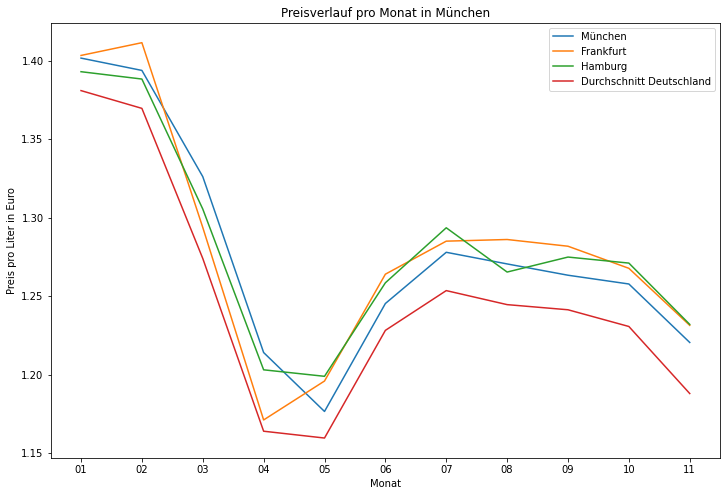

In [208]:
F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*2, Size[1]*2, forward=True)
plt.plot(monthsE5Munich, pricesE5Munich)
plt.plot(monthsE5ff, pricesE5ff)
plt.plot(monthsE5hh, pricesE5hh)
plt.plot(monthsE5, pricesE5)
plt.legend(['München','Frankfurt', 'Hamburg', 'Durchschnitt Deutschland'])
plt.xlabel('Monat')
plt.ylabel('Preis pro Liter in Euro')
plt.title("Preisverlauf pro Monat in München")
plt.show()